<center><img src="https://github.com/girishksahu/RMDS_Project_NFT/blob/SMART_Street/image/SMART%20Street%20Logo.PNG?raw=true" width="300" height="100" /></center>

<h1><center>RMDS Lab Project - NFT Value Dashboard to Summarize the Past and Predict the Future</center><h1>

<center><img width=40% src="https://github.com/girishksahu/RMDS_Project_NFT/blob/SMART_Street/image/NFT.PNG?raw=true"></center>

----
### **Table of Content**
----

**1**. [**Introduction**](#section1)<br>
  - **1.1** [**Problem Statement**](#section11)<br>
  - **1.2** [**Importing Libraries**](#section12)<br>
  
**2**. [**The Dataset**](#section2)<br>
  - **2.1** [**Load Dataset**](#section21)<br>
  - **2.2** [**Data Description**](#section22)<br>
  - **2.3** [**Dataset Structure**](#section23)<br>
  
**3**. [**Data Pre-Processing**](#section3)<br>
  - **3.1** [**Data Pre-Profiling**](#section31)<br>
  - **3.2** [**Data Pre-Processing**](#section32)<br>
  - **3.3** [**Data Post-Profiling**](#section26)<br>
  
**4**. [**Exploratory Data Analysis**](#section4)<br>

**5**. [**Data Post-Processing**](#section5)<br>
 - **5.1** [**Data Encoding**](#section51)<br>
 - **5.2** [**Data Preparation**](#section52)<br>
 - **5.3** [**Data Scaling**](#section53)<br>
 
**6**. [**Model Building & Evaluation**](#section6)<br>
 - **6.1** [**Model Building**](#section61)<br>
 - **6.2** [**Model Evaluation**](#section62)<br>
 - **6.3** [**Model Prediction**](#section63)<br>
 
**7**. [**Summary**](#section7)<br>
 - **7.1** [**Conclusion**](#section71)<br>


<a name=section1></a>

----
## **1. Introduction**
----

- Your client for this project is investor who is looking for investment and aquire assets in NFT space.

  **<h3>Current Scenario:</h3>**

- Need to create a dashboard that assesses trends in the development of NFTs and forecast their future trajectory.

---
<a name = section11></a>
### **1.1 Problem Statement**
---

- The company has hired you as a data science consultant to provide a dashboard that assesses trends in the development of NFTs and forecast their future trajectory.

   
### **Your Role**

- You are given following dataset
    - ASSETS -Each row represents a specific NFT item. It includes features like name, description, and asset category.
    - EVENTS - Each row represents a specific event about NFTs. It includes features like event type, auction type, and duration.
    - COLLECTIONS - Each row represents a specific NFT collection. It includes features like created date, description, and average price.

- Your task is to build a regression model using the dataset.

     - Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition.  
     - You need to build the best possible model.

### **Project Deliverables**
- Deliverable: **Predict Future Trajectory of NFT**

- Machine Learning Task: **Regression**

- Target Variable: **TBD**

### **Evaluation Metric**

- The model evaluation will be based on the RMSE score.

<center><img src="Domain_Logo.PNG?raw=true" width="500" /></center>

---
<a name = section12></a>
### **1.2 Importing Libraries**
---

In [158]:
!pip install sweetviz

In [159]:
%matplotlib inline
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
from scipy.stats import randint as sp_randint                       # For initializing random integer values
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
import sklearn.metrics
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # To scaled data with mean 0 and variance 1

#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression   
# ß Importing WordCloud for text data visualization
#from wordcloud import WordCloud

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV                    # To tune the models  
import sweetviz as sv

<a name=section2></a>

----
## **2. The Dataset**
----

The datasets provided are:

ASSETS
   - Each row represents a specific NFT item. It includes features like name, description, and asset category.
    
EVENTS
   - Each row represents a specific event about NFTs. It includes features like event type, auction type, and duration.
    
COLLECTIONS
   - Each row represents a specific NFT collection. It includes features like created date, description, and average price.


<a name=section21></a>

### **2.1 Load Dataset**

- Load dataset and check shape of dataset.

In [160]:
# Load assets dataset
assets = pd.read_csv("https://raw.githubusercontent.com/girishksahu/RMDS_Project_NFT/SMART_Street/dataset/Assets.csv")

# Get the dimesions of data
print('Shape of raw dataset:', assets.shape)
print('Info of raw dataset:', assets.info())

# Output first 10 data rows
assets.head(10)


Shape of raw dataset: (16550, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16550 entries, 0 to 16549
Data columns (total 31 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   token_id                                    16549 non-null  object 
 1   asset_contract_address                      16549 non-null  object 
 2   owner_address                               16549 non-null  object 
 3   collection_slug                             16549 non-null  object 
 4   last_sale_payment_token_id                  8193 non-null   float64
 5   last_sale_payment_token_symbol              8193 non-null   object 
 6   last_sale_payment_token_address             8193 non-null   object 
 7   last_sale_payment_token_name                8193 non-null   object 
 8   last_sale_payment_token_eth_price           8193 non-null   float64
 9   last_sale_payment_token_usd_price           8193 

,token_id,asset_contract_address,owner_address,collection_slug,last_sale_payment_token_id,last_sale_payment_token_symbol,last_sale_payment_token_address,last_sale_payment_token_name,last_sale_payment_token_eth_price,last_sale_payment_token_usd_price,last_sale_transaction_from_account_address,last_sale_transaction_id,last_sale_transaction_timestamp,last_sale_transaction_to_account_address,last_sale_event_timestamp,last_sale_total_price,last_sale_created_date,last_sale_quantity,is_presale,traits,name,num_sales,image_url,description,asset_contract_type,asset_contract_created_date,asset_contract_name,asset_contract_owner,asset_contract_dev_seller_fee_basis_points,asset_favorites,asset_category
0,1041544390811223925548137112510456274926830839...,0x495f947276749ce646f68ac8c248420045cb7b5e,0x0000000000000000000000000000000000000000,spiritman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,"[{'trait_type': 'smile', 'value': 'laughing', ...",#3365,0.0,https://lh3.googleusercontent.com/pUDYH7EnULJc...,NaN,semi-fungible,2020-12-02T17:40:53.232025,OpenSea Collection,102384.0,0.0,4,art
1,3408548560580985823464505673624610083362790836...,0x495f947276749ce646f68ac8c248420045cb7b5e,0x0000000000000000000000000000000000000000,byteosaurus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,"[{'trait_type': 'background', 'value': 'pink',...",Byteosaurus #8403,0.0,https://lh3.googleusercontent.com/NixgIufh8tt9...,NaN,semi-fungible,2020-12-02T17:40:53.232025,OpenSea Collection,102384.0,0.0,1,art
2,2344366250094683526428341084644309510528416437...,0x495f947276749ce646f68ac8c248420045cb7b5e,0x0000000000000000000000000000000000000000,crypto-totem-nft,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,[],crypto-totem#3597,0.0,https://lh3.googleusercontent.com/F7JUs4kn5gfm...,Crypto totem is a collection of 5555 totems cr...,semi-fungible,2020-12-02T17:40:53.232025,OpenSea Collection,102384.0,0.0,7,art
3,3038784457613480191389558437600275577887949373...,0x495f947276749ce646f68ac8c248420045cb7b5e,0x0000000000000000000000000000000000000000,ultrapunks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,"[{'trait_type': 'Gender', 'value': 'Male', 'di...",UltraPunk #3167,0.0,https://lh3.googleusercontent.com/pUq0zWz_C1tn...,Ultra Cyberpunk right now,semi-fungible,2020-12-02T17:40:53.232025,OpenSea Collection,102384.0,0.0,2,art
4,6996,0x417737d49a175d62625154262d8569d3890425ae,0x02e49aaddeca1b6b27edd1f5f43b5ed3e2be12ce,whaletogether,1.0,ETH,0x0000000000000000000000000000000000000000,Ether,1.0,2657.88,0x02e49aaddeca1b6b27edd1f5f43b5ed3e2be12ce,270300526.0,2022-02-08T11:14:13,0x0a267cf51ef038fc00e71801f5a524aec06e4f07,2022-02-08T11:14:13,120000000000000000,2022-02-08T11:14:42.037623,1.0,False,"[{'trait_type': 'Background', 'value': 'Solid ...",AlphieWhale #6996,1.0,https://lh3.googleusercontent.com/ndXzObLk0INB...,Alphie is the friendly alpha whale for the lit...,non-fungible,2022-02-02T08:11:36.815197,AlphieWhales,242350928.0,750.0,1,art
5,7865433927323427708530533979403592174622521535...,0x495f947276749ce646f68ac8c248420045cb7b5e,0x0000000000000000000000000000000000000000,etherbears,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,"[{'trait_type': 'glasses', 'value': 'none', 'd...",EtherBear #2945,0.0,https://lh3.googleusercontent.com/chv6kt1a8wXh...,NaN,semi-fungible,2020-12-02T17:40:53.232025,OpenSea Collection,102384.0,0.0,9,art
6,2478015935126700780064081867421064709564896338...,0x495f947276749ce646f68ac8c248420045cb7b5e,0x0000000000000000000000000000000000000000,dystopian-monkeys,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,"[{'trait_type': 'body', 'value': 'lemur', 'dis...",CyberMonkey #7838,0.0,https://lh3.googleusercontent.com/ZKUQPeXQGv-n...,NaN,semi-fungible,2020-12-02T17:40:53.232025,OpenSea Collection,102384.0,0.0,6,art
7,4627788511712054729107810906799003991443548850...,0x495f947276749ce646f68ac8c248420045cb7b5e,0x0000000000000000000000000000000000000000,peaceapeclub,NaN,NaN,NaN

In [161]:
# Check for any missing values
any(assets.isna().sum())

True

In [162]:
#check if any duplicate row
any(assets.duplicated())

False

In [163]:
# Load collections dataset
collections = pd.read_csv("https://raw.githubusercontent.com/girishksahu/RMDS_Project_NFT/SMART_Street/dataset/Collections.csv")

# Get the dimesions of data
print('Shape of raw dataset:', collections.shape)
print('Info of raw dataset:', collections.info())

# Output first 10 data rows
collections.head(10)


Shape of raw dataset: (1427, 46)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1427 entries, 0 to 1426
Data columns (total 46 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   primary_asset_contracts_address                      962 non-null    object 
 1   primary_asset_contracts_asset_contract_type          962 non-null    object 
 2   primary_asset_contracts_created_date                 962 non-null    object 
 3   primary_asset_contracts_name                         961 non-null    object 
 4   primary_asset_contracts_nft_version                  870 non-null    object 
 5   primary_asset_contracts_owner                        909 non-null    float64
 6   primary_asset_contracts_schema_name                  962 non-null    object 
 7   primary_asset_contracts_symbol                       894 non-null    object 
 8   primary_asset_contracts_total_suppl

,primary_asset_contracts_address,primary_asset_contracts_asset_contract_type,primary_asset_contracts_created_date,primary_asset_contracts_name,primary_asset_contracts_nft_version,primary_asset_contracts_owner,primary_asset_contracts_schema_name,primary_asset_contracts_symbol,primary_asset_contracts_total_supply,primary_asset_contracts_description,primary_asset_contracts_dev_seller_fee_basis_points,primary_asset_contracts_seller_fee_basis_points,primary_asset_contracts_payout_address,stats_one_day_volume,stats_one_day_change,stats_one_day_sales,stats_one_day_average_price,stats_seven_day_volume,stats_seven_day_change,stats_seven_day_sales,stats_seven_day_average_price,stats_thirty_day_volume,stats_thirty_day_change,stats_thirty_day_sales,stats_thirty_day_average_price,stats_total_volume,stats_total_sales,stats_total_supply,stats_count,stats_num_owners,stats_average_price,stats_market_cap,stats_floor_price,slug,stats_time,created_date,description,display_data_card_display_style,safelist_request_status,name,telegram_url,twitter_username,instagram_username,discord_url,medium_username,external_url
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.050000,0.000000,1,0.050000,0.210000,-0.468354,4,0.052500,1.666000,-0.554605,33,0.050485,11.497400,184.0,9970,9970,138,0.062486,523.425000,0.0390,spiritman,"2022-03-06, 09:45:19",2021-08-19T03:59:37.338711,Arri Novrizal[@fujhine](https://www.instagram....,contain,approved,Spirit Man,0,1,1,1,0,http://www.spiritman.io
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.058000,-0.479354,2,0.029000,0.543511,-0.192885,24,0.022646,3.651611,-0.977126,144,0.025358,205.010570,4107.0,9655,9655,2167,0.049917,218.649991,0.0159,byteosaurus,"2022-03-06, 09:45:20",2021-03-06T14:02:59.252751,Amazing collection of 9666 unique NFT dinosaur...,cover,approved,Byteosaurus,1,1,0,1,0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-1.000000,0,0.000000,0.171000,-0.250000,9,0.019000,0.684000,2.600000,36,0.019000,0.914000,47.0,5555,5555,40,0.019447,105.545000,0.0190,crypto-totem-nft,"2022-03-06, 09:45:20",2021-12-27T09:38:31.663638,Crypto totem is a collection of 5555 totems cr...,cover,approved,Crypto-Totem,0,0,0,1,0,http://cryptototem.fashionartworld.com/
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042000,-0.250000,3,0.014000,0.251500,-0.405437,18,0.013972,2.459500,0.045310,179,0.013740,85.369259,1578.0,9998,9998,916,0.054100,139.694278,0.0140,ultrapunks,"2022-03-06, 09:45:21",2021-03-09T19:01:30.147241,Ultra punks are punks inspired by official cry...,cover,approved,UltraPunks,1,1,0,1,1,NaN
4,0x417737d49a175d62625154262d8569d3890425ae,non-fungible,2022-02-02T08:11:36.815197,AlphieWhales,3,242350928.0,ERC721,ALPHIE,0.0,"A collection of 7,777 AlphieWhales that give y...",750.0,1000.0,0xb66a00e7f232089fc65ee50f328b870f7c20280d,2.217790,0.102068,27,0.082140,17.672858,-0.608661,223,0.079250,723.374239,54.486903,5366,0.134807,736.411086,5492.0,7777,7777,4822,0.134088,616.331016,0.0730,whaletogether,"2022-03-06, 09:45:21",2022-02-03T04:38:30.947260,"A collection of 7,777 AlphieWhales that give y...",cover,approved,WhaleTogether,0,0,0,1,0,https://whaletogether.com/
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.035000,0.166667,2,0.017500,0.261700,-0.728245,11,0.023791,2.961600,-0.002895,148,0.020011,79.350256,2280.0,4997,4997,1447,0.034803,118.883173,0.0200,etherbears,"2022-03-06, 09:45:21",2021-03-19T14:56:09.976599,"A happily grizzly bear named Ether , has his w...",cover,approved,EtherBears,0,1,1,1,0,http://etherbears.club/
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.055000,0.000000,2,0.027500,0.350000,0.394422,14,0.025000,2.126000,1.779085,74,0.028730,3.110000,98.0,10014,10014,86,0.031735,250.350000,0.0250,dystopian-monkeys,"2022-03-06, 09:45:22",2021-05-18T17:19:45.151439,Dystopian Monkeys is a unique generated collec...,cover,approved,Dystopian Monkeys,0,1,0,0,0,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.840000,-0.347319,21,0.040000,6.56

In [164]:
# Check for any missing values
any(collections.isna().sum())

True

In [165]:
#check if any duplicate row
any(collections.duplicated())

False

In [166]:
# Load events dataset
events = pd.read_csv("https://raw.githubusercontent.com/girishksahu/RMDS_Project_NFT/SMART_Street/dataset/events.csv")

# Get the dimesions of data
print('Shape of raw dataset:', events.shape)
print('Info of raw dataset:', events.info())

# Output first 10 data rows
events.head(10)

Shape of raw dataset: (87404, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87404 entries, 0 to 87403
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   asset_token_id                    87404 non-null  object 
 1   asset_contract_address            87404 non-null  object 
 2   asset_owner_address               87404 non-null  object 
 3   asset_owner_user                  78076 non-null  object 
 4   collection_slug                   87404 non-null  object 
 5   created_date                      87404 non-null  object 
 6   id                                87404 non-null  int64  
 7   quantity                          87351 non-null  float64
 8   listing_time                      58756 non-null  object 
 9   event_type                        87404 non-null  object 
 10  total_price                       19614 non-null  object 
 11  auction_type                     

C:\Users\satvik\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,asset_token_id,asset_contract_address,asset_owner_address,asset_owner_user,collection_slug,created_date,id,quantity,listing_time,event_type,total_price,auction_type,duration,ending_price,starting_price,is_private,transaction_from_account_address,transaction_to_account_address,from_account_address,to_account_address
0,9652564406348144737240103651986701405835049840...,0x495f947276749ce646f68ac8c248420045cb7b5e,0x0000000000000000000000000000000000000000,NullAddress,-persona,2022-02-26T22:36:39.940781,3707623152,1.0,2022-02-26T22:36:33,created,NaN,dutch,744355.0,150000000000000000,150000000000000000,False,NaN,NaN,0xd567941697e29e458b0cd46ef5d147fc653f546a,0xd567941697e29e458b0cd46ef5d147fc653f546a
1,9652564406348144737240103651986701405835049840...,0x495f947276749ce646f68ac8c248420045cb7b5e,0x0000000000000000000000000000000000000000,NullAddress,-persona,2022-02-05T13:24:04.330138,3280041145,1.0,2022-02-05T13:21:00,created,NaN,dutch,2592088.0,150000000000000000,150000000000000000,False,NaN,NaN,0xd567941697e29e458b0cd46ef5d147fc653f546a,NaN
2,9652564406348144737240103651986701405835049840...,0x495f947276749ce646f68ac8c248420045cb7b5e,0x0000000000000000000000000000000000000000,NullAddress,-persona,2022-02-05T13:22:43.723328,3280022640,1.0,2022-02-05T13:20:53,created,NaN,dutch,604895.0,150000000000000000,150000000000000000,False,NaN,NaN,0xd567941697e29e458b0cd46ef5d147fc653f546a,NaN
3,9652564406348144737240103651986701405835049840...,0x495f947276749ce646f68ac8c248420045cb7b5e,0x0000000000000000000000000000000000000000,NullAddress,-persona,2022-02-02T13:58:26.564868,3222798752,1.0,NaN,transfer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0x0000000000000000000000000000000000000000,NaN
4,5108264144382047380331840980799559675300158545...,0x495f947276749ce646f68ac8c248420045cb7b5e,0x0000000000000000000000000000000000000000,NullAddress,ibinola,2022-03-05T23:39:29.367868,3889292601,1.0,2022-03-05T23:37:27,created,NaN,dutch,557675.0,70000000000000000,70000000000000000,False,0x911bf7f46044addd684f84fd4b15b8309ca3fa79,0x7f268357a8c2552623316e2562d90e642bb538e5,0x911bf7f46044addd684f84fd4b15b8309ca3fa79,0x911bf7f46044addd684f84fd4b15b8309ca3fa79
5,5108264144382047380331840980799559675300158545...,0x495f947276749ce646f68ac8c248420045cb7b5e,0x0000000000000000000000000000000000000000,NullAddress,ibinola,2022-03-05T18:53:40.248715,3883968814,1.0,2022-03-05T18:51:56,created,NaN,dutch,574806.0,250000000000000000,250000000000000000,False,0x911bf7f46044addd684f84fd4b15b8309ca3fa79,0x7f268357a8c2552623316e2562d90e642bb538e5,0x911bf7f46044addd684f84fd4b15b8309ca3fa79,NaN
6,5108264144382047380331840980799559675300158545...,0x495f947276749ce646f68ac8c248420045cb7b5e,0x0000000000000000000000000000000000000000,NullAddress,ibinola,2022-03-05T10:32:21.198502,3874674070,1.0,2022-03-05T10:30:34,created,NaN,dutch,604888.0,500000000000000000,500000000000000000,False,NaN,NaN,0x911bf7f46044addd684f84fd4b15b8309ca3fa79,NaN
7,5108264144382047380331840980799559675300158545...,0x495f947276749ce646f68ac8c248420045cb7b5e,0x0000000000000000000000000000000000000000,NullAddress,ibinola,2022-03-05T10:22:23.990537,3874492035,1.0,2022-03-05T10:07:23,successful,50000000000000000,NaN,NaN,NaN,NaN,False,NaN,NaN,0x70efc01e5e2789e0d05425e1361c919e922b7a0d,NaN
8,5108264144382047380331840980799559675300158545...,0x495f947276749ce646f68ac8c248420045cb7b5e,0x0000000000000000000000000000000000000000,NullAddress,ibinola,2022-03-05T10:22:23.900526,3874492001,1.0,NaN,transfer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5140718963811531250815597804126819996957061857...,0x495f947276749ce646f68ac8c248420045cb7b5e,0x0000000000000000000000000000000000000000,NullAddress,naturesfury-collection-130001526,2022-03-05T14:26:52.565219,3878914923,1.0,2022-02-18T20:59:52,successful,100000000000000000,NaN,NaN,NaN,NaN,False,0xe5798a530bb7105e148d38ac884f05c28ed8e804,0x7f268357a8c2552623316e2562d90e642bb538e5,0x71a7702ff3d858a0853a918fb44c537740a8bde9,0xe5798a530bb7105e148d38ac884f05c28ed8e804


In [167]:
# Check for any missing values
any(events.isna().sum())

True

In [168]:
#check if any duplicate row
any(events.duplicated())

False

<a name=section22></a>

### **2.2 Data Description**

- Get **information about the data** and capture observations.

In [169]:
#Basic statistical details for numeric variables
assets.describe(include=[np.float64]).transpose()

,count,mean,std,min,25%,50%,75%,max
last_sale_payment_token_id,8193.0,3.537898e+00,3.212417e+01,1.000000e+00,1.0,1.0,1.0,611.0
last_sale_payment_token_eth_price,8193.0,9.881751e-01,1.080376e-01,3.451000e-05,1.0,1.0,1.0,1.0
last_sale_payment_token_usd_price,8193.0,2.601475e+03,2.845901e+02,9.128800e-02,2628.8,2630.0,2630.0,2667.0
last_sale_transaction_id,8193.0,2.835562e+08,2.860366e+07,4.232352e+06,290934702.0,292786738.0,293335571.0,293726531.0
last_sale_quantity,8192.0,1.072876e+00,2.939414e+00,1.000000e+00,1.0,1.0,1.0,150.0
num_sales,16549.0,1.058765e+01,1.661763e+02,0.000000e+00,0.0,0.0,1.0,16098.0
asset_contract_owner,15729.0,9.061666e+07,1.018838e+08,6.010000e+02,102384.0,53533296.0,183491245.0,268472550.0
asset_contract_dev_seller_fee_basis_points,16549.0,3.533366e+02,3.845657e+02,0.000000e+00,0.0,250.0,750.0,1000.0


**Observations:**
- Total count for all numeric variables is same as 27000 which confirms that there are no missing values.

In [170]:
#Basic statistical details for numeric variables
#assets.describe(include=[np.int64]).transpose()

**Observations:**
- TBD.

In [171]:
#Basic statistical details for categorical variables
assets.describe(include=[np.object]).transpose()

C:\Users\satvik\AppData\Local\Temp/ipykernel_13208/2318499779.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assets.describe(include=[np.object]).transpose()


,count,unique,top,freq
token_id,16549,14004,1,30
asset_contract_address,16549,976,0x495f947276749ce646f68ac8c248420045cb7b5e,6696
owner_address,16549,5593,0x0000000000000000000000000000000000000000,7762
collection_slug,16549,1426,ens,1101
last_sale_payment_token_symbol,8193,9,ETH,7691
last_sale_payment_token_address,8193,9,0x0000000000000000000000000000000000000000,7691
last_sale_payment_token_name,8193,9,Ether,7691
last_sale_transaction_from_account_address,8193,5569,0x3cf08d6a9436a1798c18d24a70f5ad0bea31775e,40
last_sale_transaction_timestamp,8193,5017,2022-03-06T07:53:06,36
last_sale_transaction_to_account_address,8193,24,0x7f268357a8c2552623316e2562d90e642bb538e5,6047


**Observations:**
- TBD.

In [172]:
#Basic statistical details for numeric variables
collections.describe(include=[np.float64]).transpose()

,count,mean,std,min,25%,50%,75%,max
primary_asset_contracts_owner,909.0,1.332641e+08,8.383059e+07,601.000000,5.988452e+07,1.245183e+08,2.039288e+08,2.684726e+08
primary_asset_contracts_total_supply,772.0,1.502591e+74,4.174931e+75,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.160000e+77
primary_asset_contracts_dev_seller_fee_basis_points,962.0,6.408295e+02,2.728897e+02,0.000000,5.000000e+02,6.000000e+02,9.345000e+02,1.000000e+03
primary_asset_contracts_seller_fee_basis_points,962.0,8.897900e+02,2.747530e+02,250.000000,7.500000e+02,8.500000e+02,1.184500e+03,1.250000e+03
stats_one_day_volume,1427.0,9.561174e+00,6.058595e+01,0.000000,3.000000e-02,3.480000e-01,2.387995e+00,1.502581e+03
stats_one_day_change,1427.0,1.110691e+00,1.474783e+01,-1.000000,-3.574578e-01,0.000000e+00,3.003175e-01,5.187149e+02
stats_one_day_average_price,1427.0,4.356762e-01,3.386030e+00,0.000000,1.205000e-02,6.000000e-02,1.950000e-01,9.900000e+01
stats_seven_day_volume,1427.0,7.846226e+01,4.166296e+02,0.000000,1.932000e-01,2.252000e+00,1.984390e+01,6.548109e+03
stats_seven_day_change,1427.0,3.591220e-01,4.484762e+00,-1.000000,-5.153758e-01,0.000000e+00,0.000000e+00,1.449780e+02
stats_seven_day_average_price,1427.0,5.394127e-01,3.635685e+00,0.000000,3.000000e-02,8.510000e-02,2.294250e-01,9.448925e+01


In [173]:
#Basic statistical details for numeric variables
collections.describe(include=[np.int64]).transpose()

,count,mean,std,min,25%,50%,75%,max
stats_one_day_sales,1427.0,25.995795,139.000262,0.0,1.0,4.0,15.0,3351.0
stats_seven_day_sales,1427.0,193.095305,818.742395,0.0,3.0,28.0,111.5,12354.0
stats_thirty_day_sales,1427.0,861.225648,2355.114157,0.0,13.0,144.0,641.5,49408.0
stats_total_supply,1427.0,7971.292221,58944.074364,1.0,92.0,2838.0,8750.5,2011039.0
stats_count,1427.0,7971.292221,58944.074364,1.0,92.0,2838.0,8750.5,2011039.0
stats_num_owners,1427.0,2508.598458,10780.389950,1.0,90.0,883.0,2898.5,285059.0
telegram_url,1427.0,0.070778,0.256543,0.0,0.0,0.0,0.0,1.0
twitter_username,1427.0,0.471619,0.499369,0.0,0.0,0.0,1.0,1.0
instagram_username,1427.0,0.489138,0.500057,0.0,0.0,0.0,1.0,1.0
discord_url,1427.0,0.691661,0.461969,0.0,0.0,1.0,1.0,1.0


In [174]:
#Basic statistical details for categorical variables
collections.describe(include=[np.object]).transpose()

C:\Users\satvik\AppData\Local\Temp/ipykernel_13208/414946832.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  collections.describe(include=[np.object]).transpose()


,count,unique,top,freq
primary_asset_contracts_address,962,962,0x417737d49a175d62625154262d8569d3890425ae,1
primary_asset_contracts_asset_contract_type,962,3,non-fungible,871
primary_asset_contracts_created_date,962,961,2018-01-23T04:51:38.832339,2
primary_asset_contracts_name,961,917,Unidentified contract,44
primary_asset_contracts_nft_version,870,3,3,866
primary_asset_contracts_schema_name,962,4,ERC721,870
primary_asset_contracts_symbol,894,867,CC,4
primary_asset_contracts_description,948,944,"Introducing FCF's Ballerz Collective, the firs...",4
primary_asset_contracts_payout_address,920,852,0x9823f36c34dba0a9d88215f8eb7e6618162ffbb8,4
slug,1426,1425,#NAME?,2


In [175]:
#Basic statistical details for numeric variables
events.describe(include=[np.float64]).transpose()

,count,mean,std,min,25%,50%,75%,max
quantity,87351.0,1.348834e+00,1.813175e+01,1.0,1.0,1.0,1.0,4.330000e+03
duration,40891.0,1.329625e+07,1.760933e+09,0.0,86499.0,259270.0,604892.0,2.517953e+11


In [176]:
#Basic statistical details for numeric variables
events.describe(include=[np.int64]).transpose()

,count,mean,std,min,25%,50%,75%,max
id,87404.0,3.582433e+09,6.843176e+08,894468.0,3.673351e+09,3.817120e+09,3.873312e+09,3.892273e+09


In [177]:
#Basic statistical details for categorical variables
events.describe(include=[np.object]).transpose()

C:\Users\satvik\AppData\Local\Temp/ipykernel_13208/3771586369.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  events.describe(include=[np.object]).transpose()


,count,unique,top,freq
asset_token_id,87404,13444,1,608
asset_contract_address,87404,966,0x495f947276749ce646f68ac8c248420045cb7b5e,29972
asset_owner_address,87404,5408,0x0000000000000000000000000000000000000000,44302
asset_owner_user,78076,4346,NullAddress,44302
collection_slug,87404,1404,ens,5358
created_date,87404,87392,2018-01-23T04:51:38.879873,13
listing_time,58756,52074,2022-01-04T13:00:44,19
event_type,87404,8,created,41626
total_price,19614,3200,10000000000000000,395
auction_type,41792,3,dutch,41326


<a name=section23></a>

### **2.3 Dataset Structure**

- Get **information about the dataset structure** and capture observations.

In [178]:
# display summary of dataset structure
assets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16550 entries, 0 to 16549
Data columns (total 31 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   token_id                                    16549 non-null  object 
 1   asset_contract_address                      16549 non-null  object 
 2   owner_address                               16549 non-null  object 
 3   collection_slug                             16549 non-null  object 
 4   last_sale_payment_token_id                  8193 non-null   float64
 5   last_sale_payment_token_symbol              8193 non-null   object 
 6   last_sale_payment_token_address             8193 non-null   object 
 7   last_sale_payment_token_name                8193 non-null   object 
 8   last_sale_payment_token_eth_price           8193 non-null   float64
 9   last_sale_payment_token_usd_price           8193 non-null   float64
 10  last_sale_

In [179]:
# display summary of dataset structure
collections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1427 entries, 0 to 1426
Data columns (total 46 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   primary_asset_contracts_address                      962 non-null    object 
 1   primary_asset_contracts_asset_contract_type          962 non-null    object 
 2   primary_asset_contracts_created_date                 962 non-null    object 
 3   primary_asset_contracts_name                         961 non-null    object 
 4   primary_asset_contracts_nft_version                  870 non-null    object 
 5   primary_asset_contracts_owner                        909 non-null    float64
 6   primary_asset_contracts_schema_name                  962 non-null    object 
 7   primary_asset_contracts_symbol                       894 non-null    object 
 8   primary_asset_contracts_total_supply                 772 non-null   

In [180]:
# display summary of dataset structure
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87404 entries, 0 to 87403
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   asset_token_id                    87404 non-null  object 
 1   asset_contract_address            87404 non-null  object 
 2   asset_owner_address               87404 non-null  object 
 3   asset_owner_user                  78076 non-null  object 
 4   collection_slug                   87404 non-null  object 
 5   created_date                      87404 non-null  object 
 6   id                                87404 non-null  int64  
 7   quantity                          87351 non-null  float64
 8   listing_time                      58756 non-null  object 
 9   event_type                        87404 non-null  object 
 10  total_price                       19614 non-null  object 
 11  auction_type                      41792 non-null  object 
 12  dura

**Observations:**
- TBD

In [181]:
# Columns list can be handy and useful for further steps
assets.columns

Index(['token_id', 'asset_contract_address', 'owner_address',
       'collection_slug', 'last_sale_payment_token_id',
       'last_sale_payment_token_symbol', 'last_sale_payment_token_address',
       'last_sale_payment_token_name', 'last_sale_payment_token_eth_price',
       'last_sale_payment_token_usd_price',
       'last_sale_transaction_from_account_address',
       'last_sale_transaction_id', 'last_sale_transaction_timestamp',
       'last_sale_transaction_to_account_address', 'last_sale_event_timestamp',
       'last_sale_total_price', 'last_sale_created_date', 'last_sale_quantity',
       'is_presale', 'traits', 'name', 'num_sales', 'image_url', 'description',
       'asset_contract_type', 'asset_contract_created_date',
       'asset_contract_name', 'asset_contract_owner',
       'asset_contract_dev_seller_fee_basis_points', 'asset_favorites',
       'asset_category'],
      dtype='object')

In [182]:
# Columns list can be handy and useful for further steps
collections.columns

Index(['primary_asset_contracts_address',
       'primary_asset_contracts_asset_contract_type',
       'primary_asset_contracts_created_date', 'primary_asset_contracts_name',
       'primary_asset_contracts_nft_version', 'primary_asset_contracts_owner',
       'primary_asset_contracts_schema_name', 'primary_asset_contracts_symbol',
       'primary_asset_contracts_total_supply',
       'primary_asset_contracts_description',
       'primary_asset_contracts_dev_seller_fee_basis_points',
       'primary_asset_contracts_seller_fee_basis_points',
       'primary_asset_contracts_payout_address', 'stats_one_day_volume',
       'stats_one_day_change', 'stats_one_day_sales',
       'stats_one_day_average_price', 'stats_seven_day_volume',
       'stats_seven_day_change', 'stats_seven_day_sales',
       'stats_seven_day_average_price', 'stats_thirty_day_volume',
       'stats_thirty_day_change', 'stats_thirty_day_sales',
       'stats_thirty_day_average_price', 'stats_total_volume',
       'stats_

In [183]:
# Columns list can be handy and useful for further steps
events.columns

Index(['asset_token_id', 'asset_contract_address', 'asset_owner_address',
       'asset_owner_user', 'collection_slug', 'created_date', 'id', 'quantity',
       'listing_time', 'event_type', 'total_price', 'auction_type', 'duration',
       'ending_price', 'starting_price', 'is_private',
       'transaction_from_account_address', 'transaction_to_account_address',
       'from_account_address', 'to_account_address'],
      dtype='object')

<a name = section3></a>

---
# **3. Data Pre-Processing**
---

<a name = section31></a>
### **3.1 Data Pre-Profiling**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

sweet_report = sv.analyze(assets)
sweet_report.show_html('assets_sweetviz_report.html')

sweet_report = sv.analyze(collections)
sweet_report.show_html('collections_sweetviz_report.html')

In [184]:
# convert starting_price from object type to float type
events['starting_price']= pd.to_numeric(events['starting_price'],errors='coerce')

In [185]:
# convert ending_price from object type to float type
events['ending_price']= pd.to_numeric(events['ending_price'],errors='coerce')

In [186]:
# convert total_price from object type to float type
events['total_price']= pd.to_numeric(events['total_price'],errors='coerce')

sweet_report = sv.analyze(events)
sweet_report.show_html('events_sweetviz_report.html')

<a name = section32></a>
### **3.2 Data Pre-Processing**

- We need to pre process few features before EDA and Model Evaluation as needed

In [187]:
# merge events and collections dataset using collection_slug and slug
train_df =pd.merge(events, collections, how="inner", left_on=["collection_slug"], right_on=["slug"])

In [188]:
# merge train_df and assets dataset using asset_token_id and token_id
train_df = pd.merge(train_df,assets, how="inner", left_on=["asset_token_id"], right_on=["token_id"])

In [189]:
train_df.drop(columns=['asset_contract_address_y','collection_slug_y','created_date_y','description_y','name_y'], axis=1, inplace=True)

In [190]:
train_df.rename(columns={'asset_contract_address_x':'asset_contract_address','description_x':'description','name_x':'name','collection_slug_x':'collection_slug','created_date_x':'created_date'}, inplace=True)

In [191]:
# convert from object type to float type
train_df['total_price']= pd.to_numeric(train_df['total_price'],errors='coerce')
# convert from object type to float type
train_df['last_sale_total_price']= pd.to_numeric(train_df['last_sale_total_price'],errors='coerce')
# convert from object type to float type
train_df['ending_price']= pd.to_numeric(train_df['ending_price'],errors='coerce')
# convert from object type to float type
train_df['starting_price']= pd.to_numeric(train_df['starting_price'],errors='coerce')

In [192]:
train_df.drop(columns=['id','last_sale_payment_token_id','asset_contract_owner','last_sale_transaction_id','primary_asset_contracts_owner'], axis=1, inplace=True)

In [193]:
# convert from object type to datetime type
train_df['created_date']= pd.to_datetime(train_df['created_date'])
# convert from object type to datetime type
train_df['listing_time']= pd.to_datetime(train_df['listing_time'])
# convert from object type to datetime type
train_df['primary_asset_contracts_created_date']= pd.to_datetime(train_df['primary_asset_contracts_created_date'])
# convert from object type to datetime type
train_df['last_sale_transaction_timestamp']= pd.to_datetime(train_df['last_sale_transaction_timestamp'])
# convert from object type to datetime type
train_df['last_sale_created_date']= pd.to_datetime(train_df['last_sale_created_date'])
# convert from object type to datetime type
train_df['asset_contract_created_date']= pd.to_datetime(train_df['asset_contract_created_date'])

train_df['asset_favorites'].replace(['1.0K','1.1K','1.2K','1.3K','1.5K','1.6K','2.0K','4.5K'],[1000,1100,1200,1300,1500,1600,2000,4500])

In [194]:
train_df['asset_favorites'].replace(to_replace={'K':'e+3'},inplace=True,regex=True)
train_df['asset_favorites']=train_df['asset_favorites'].astype(float,errors='raise')
train_df['asset_favorites']=train_df['asset_favorites'].astype(int,errors='raise')
train_df['asset_favorites'].unique()

array([    17,     15,     23,      8,     12,     14,     16,     28,
           21,      3,      5,      4,      0,      2,     10,    101,
            1,      6,      7,     76,      9,     86,     11,     13,
           25,     33,     40,   1000,    953,    463,    865,    152,
         4500,   2000,    423,    977,    268,    512,   1100,     84,
          254,    104,    832,    759,    428,    824,     18,     22,
           46,     37,    386,    121,     20,     98,     24,    103,
          468,    603,    581,    159,    307,    178,    363,   1300,
          158,     47,    242,    279,     72,   1200,    692,     85,
           69,     67,     64,     77,     68,     73,     96,     27,
           53,     29,     63,     34,     44,    126,     19,   5700,
           26,     82,    197,     43,     32,     54,     30,     50,
          151,    233,    218,    369,    137,   1600,    287,    207,
           60,    866,     55,    781,    217,     35,    215,     42,
      

In [197]:
train_df.drop(train_df[train_df['asset_favorites']==321200].index,inplace=True)

# convert from object type to float type
train_df['asset_favorites']= pd.to_numeric(train_df['asset_favorites'],errors='coerce')

In [198]:
train_df.isna().sum()

asset_token_id                                              0
asset_contract_address                                      0
asset_owner_address                                         0
asset_owner_user                                        16375
collection_slug                                             0
created_date                                                0
quantity                                                   60
listing_time                                            53818
event_type                                                  0
total_price                                            100159
auction_type                                            95508
duration                                                96744
ending_price                                            95871
starting_price                                          95871
is_private                                              53818
transaction_from_account_address                        87123
transact

<a name = section33></a>
### **3.3 Data Post-Profiling**

- We can run the pandas profiling report to get latest information

sweet_report = sv.analyze(train_df)
sweet_report.show_html('train_df_sweetviz_report.html')

**Observations:**

- Not Applicable

<a name = section4></a>

---
# **4. Exploratory Data Analysis**
---

**NOTE**:  

- Exploratory Data Analysis will explore all the features and their relationship with other features
- Both non-graphical and graphical method will be used as applicable to respective features
- Both univariate and bivariate method be used as applicable to respective features

<a name = section42></a>
### **4.2 EDA**

- We will use matplotlib, seaborn plots and plotlyExpress for Manual EDA on dataset(s)

What is the correlation between numeric variables?

Text(0.5, 1.0, 'Correlation between Numerical features')

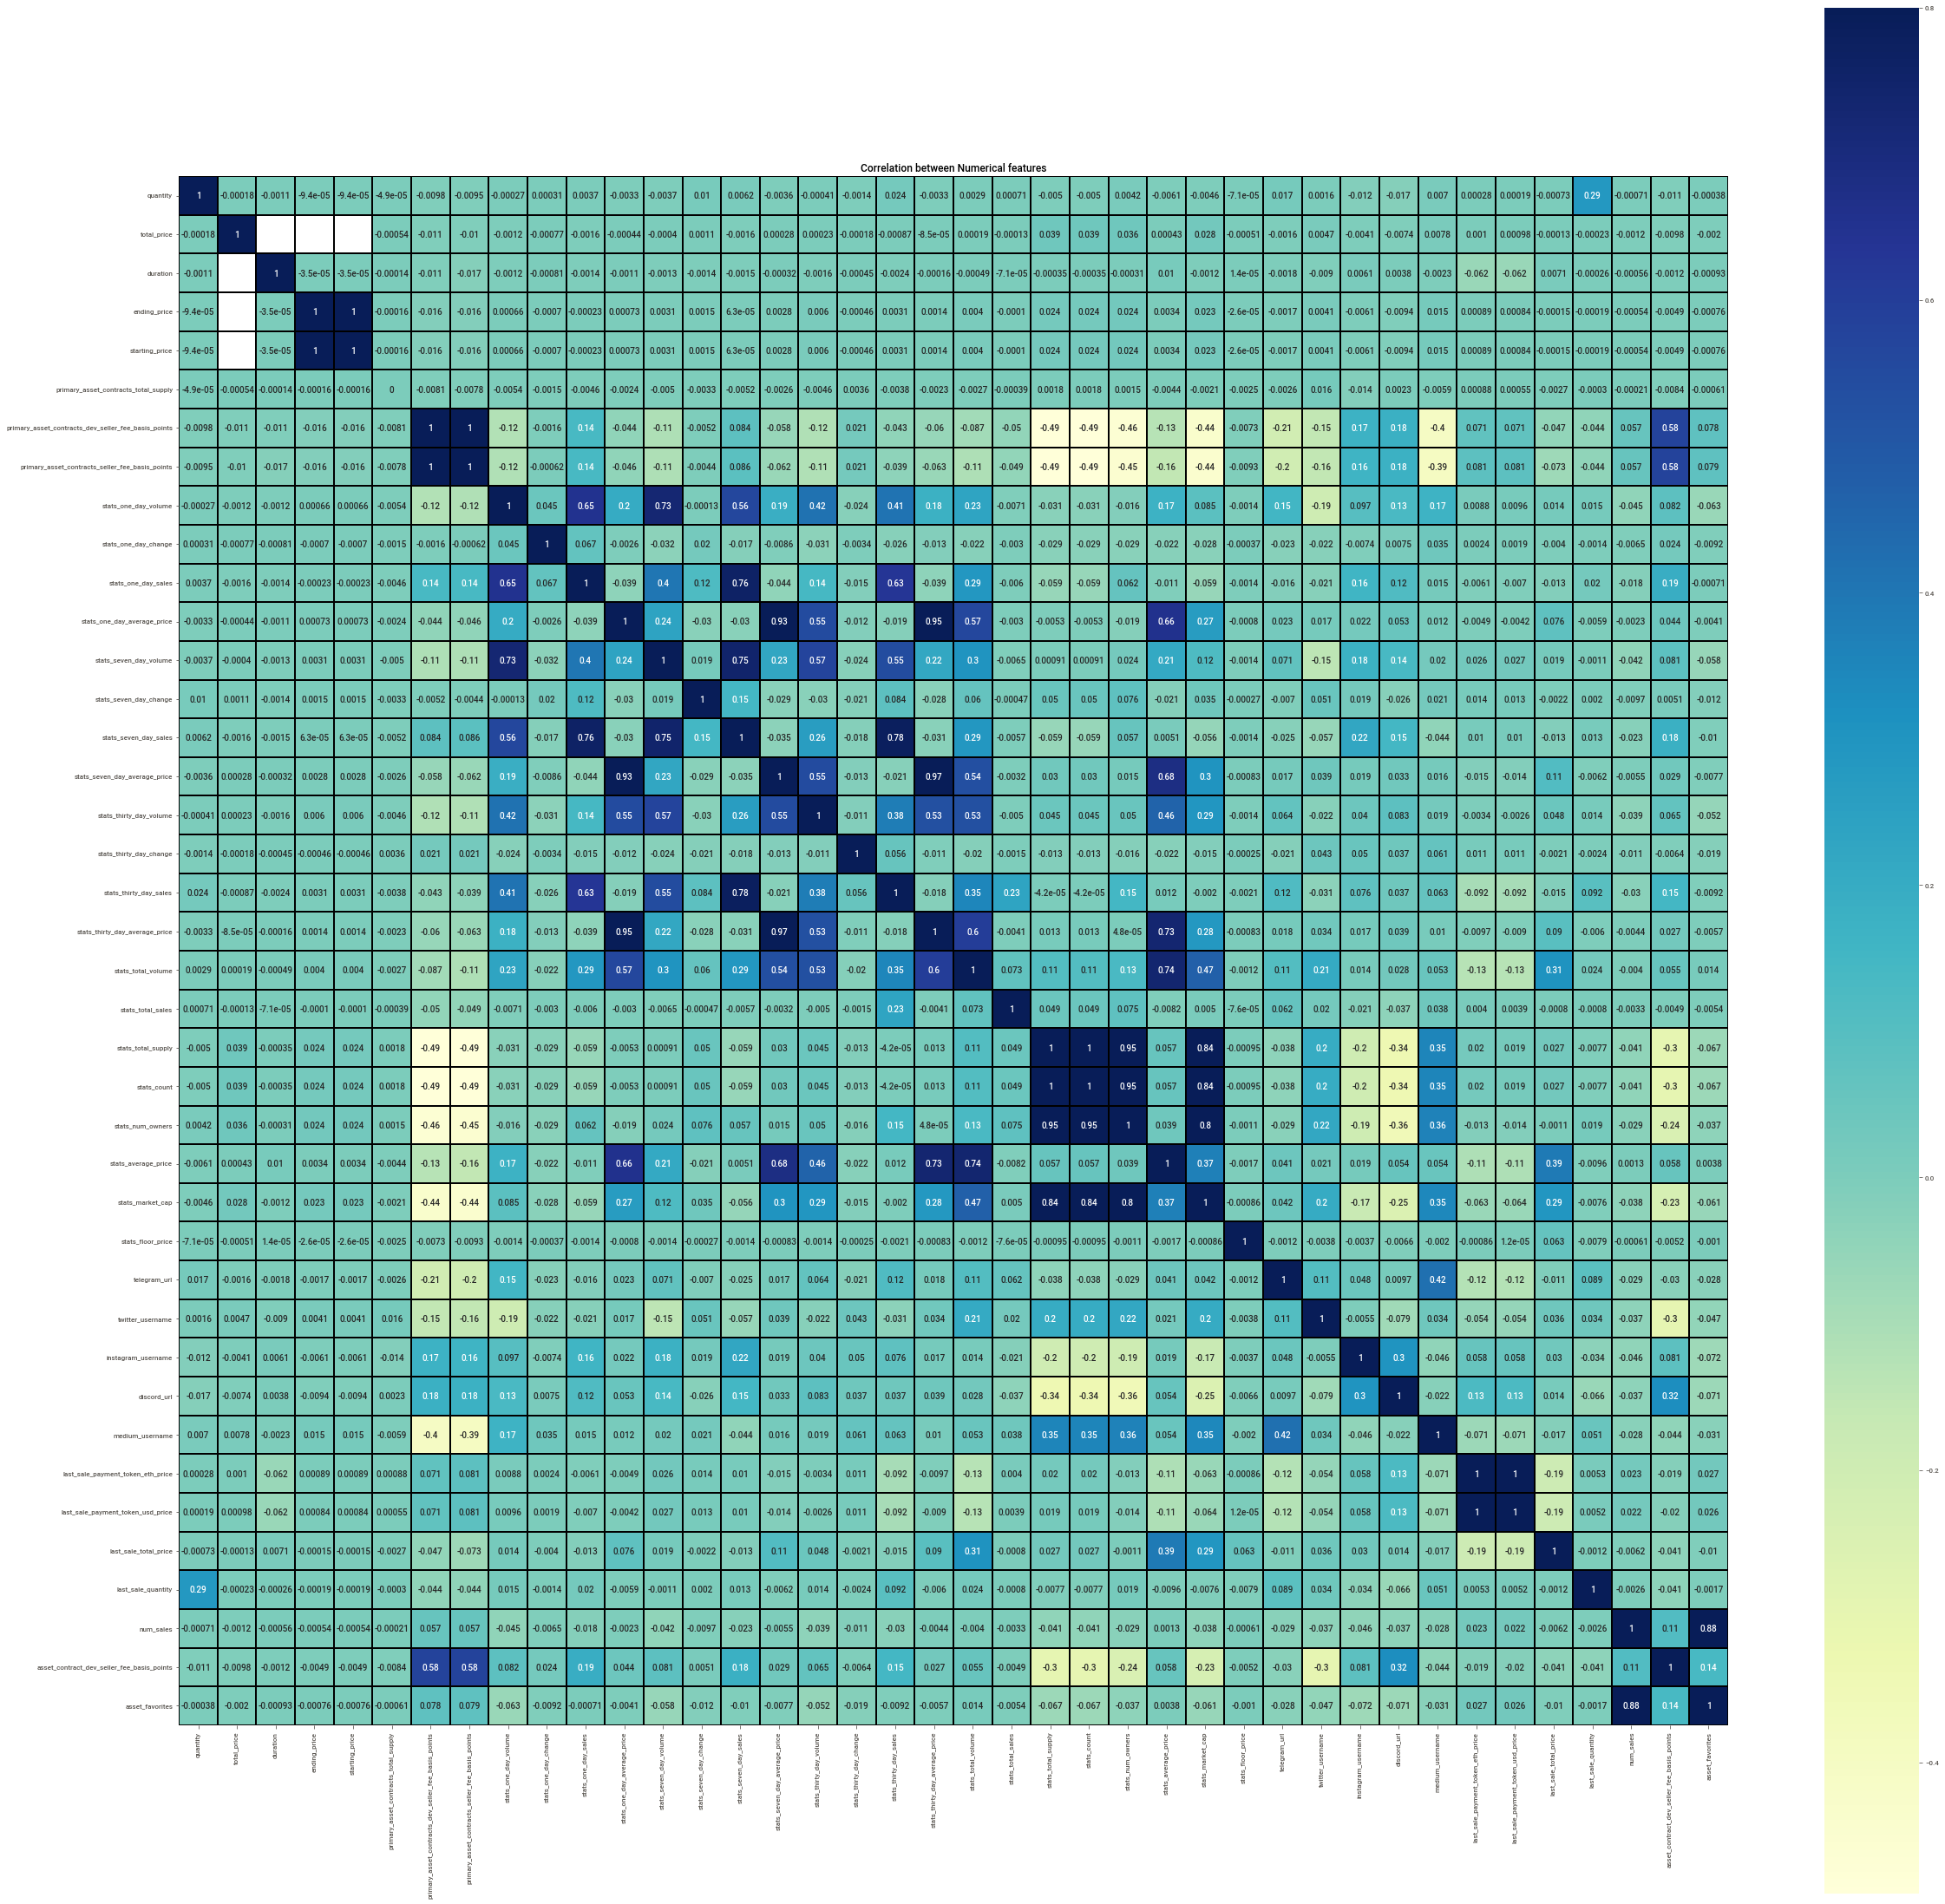

In [199]:
#Check corelation primarily between Numerical linear features and target variable
#Correlation is a measure used to represent how strongly two random variables are related to each other.
#Correlation ranges between -1 and +1
corr = train_df.corr(method='pearson')
plt.figure(figsize=(40,40))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between Numerical features')

**Observations:**

- TBD

What is the relationship between numeric variables?

In [200]:
# plot pairwise relationship in a dataset
# plt.figure(figsize=(50,25))
# sns.pairplot(data=train_df,palette='rainbow',diag_kind='kde')
# plt.show()

**Observations:**

- TBD

In [201]:
#Covariance is a measure to indicate the extent to which two random variables change in tandem.
#Covariance can vary between -∞ and +∞
#train_df.cov()

**Observations:**

- TBD

What is the trend for Total price?

In [202]:
# group by date_time without index
data_column=['event_type', 'total_price']
data_by_date = events.groupby(by = 'created_date', as_index = False)[data_column].agg('max')

In [203]:
data_by_date.head()

,created_date,event_type,total_price
0,2018-01-23T04:51:38.879873,transfer,5.713472e+15
1,2018-10-09T22:01:28.518171,transfer,NaN
2,2018-12-19T12:34:43.271937,successful,1.399900e+22
3,2019-01-05T06:28:13.099839,successful,1.599900e+22
4,2019-01-11T19:31:49.275118,successful,1.250000e+22


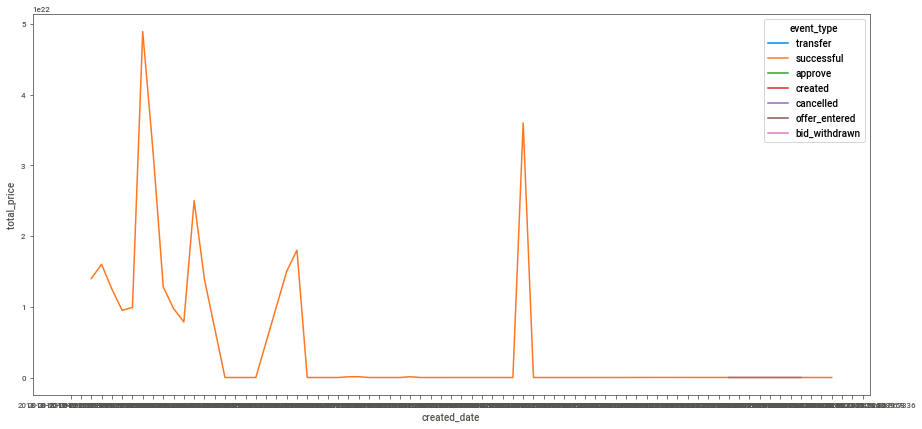

In [204]:
# trend for total_price 
figure = plt.figure(figsize = [15, 7])
sns.lineplot(x = 'created_date', y= 'total_price', data = data_by_date[:100], hue='event_type')
plt.show()

**Observations:**

- TBD

What is the distribution for event_type?

In [205]:
events['event_type'].value_counts()

created          41626
successful       19050
offer_entered    17621
transfer          8380
cancelled          446
bid_entered        156
bid_withdrawn      124
approve              1
Name: event_type, dtype: int64

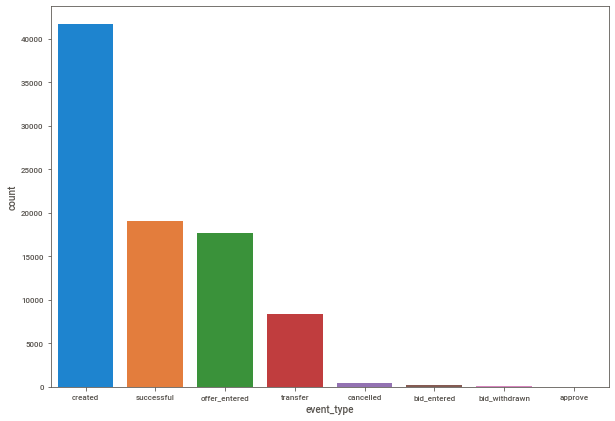

In [206]:
plt.figure(figsize=(10,7))
sns.countplot(x='event_type',data=events,order=events['event_type'].value_counts().index)
plt.show()

What is the distribution for auction_type?

In [207]:
events['auction_type'].value_counts()

dutch        41326
english        461
min_price        5
Name: auction_type, dtype: int64

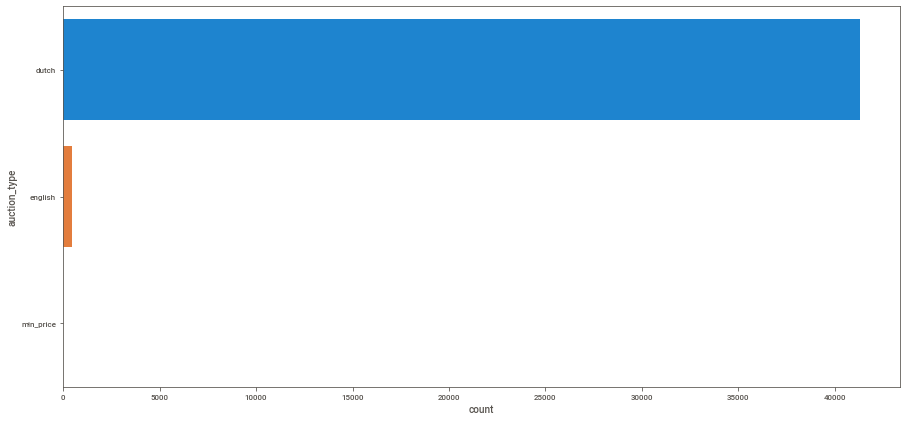

In [208]:
plt.figure(figsize=(15,7))
sns.countplot(y='auction_type',data=events,order=events['auction_type'].value_counts().index)
plt.show()

In [209]:
#events['collection_slug'].value_counts()

In [210]:
# plt.figure(figsize=(15,7))
# sns.countplot(y='collection_slug',data=events_df,order=events['collection_slug'].value_counts().index)
# plt.show()

In [211]:
assets['asset_category'].value_counts()

collectibles          5283
art                   3542
utility               2280
sports                1425
domain-names          1211
trading-cards          806
virtual-worlds         706
music                  549
photography            483
science&technology     265
Name: asset_category, dtype: int64

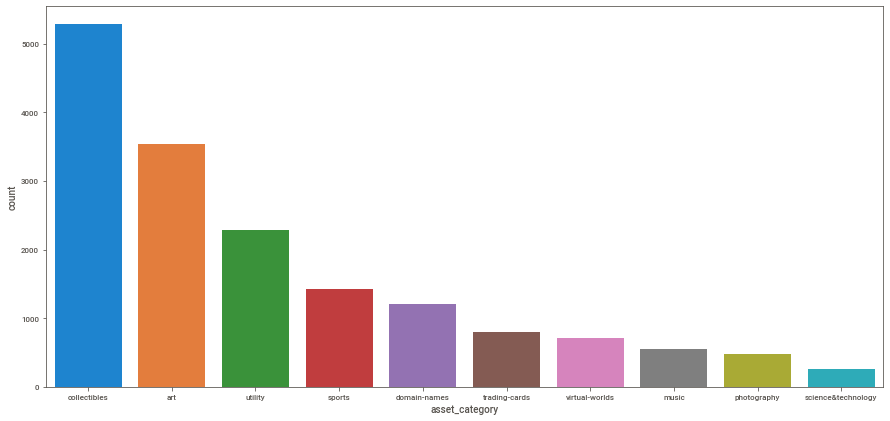

In [212]:
plt.figure(figsize=(15,7))
sns.countplot(x='asset_category',data=assets,order=assets['asset_category'].value_counts().index)
plt.show()

In [213]:
pd.to_datetime(assets['asset_contract_created_date'])
assets.loc[:,'created_Time'] = pd.to_datetime(assets['asset_contract_created_date'])
assets['year_created'] = pd.to_datetime(assets['created_Time']).dt.year
assets['year_created'] = assets['year_created'].astype('Int64')
assets['Month_created']=pd.to_datetime(assets['created_Time']).dt.month
assets['Month_created'] = assets['Month_created'].astype('Int64')
assets['day_created']=pd.to_datetime(assets['created_Time']).dt.day
assets['day_created'] = assets['day_created'].astype('Int64')
# print(assets.info())
# assets

In [214]:
pd.to_datetime(assets['last_sale_transaction_timestamp'])
assets.loc[:,'sale_Time'] = pd.to_datetime(assets['last_sale_transaction_timestamp'])
assets['year_sale'] = pd.to_datetime(assets['sale_Time']).dt.year
assets['year_sale'] = assets['year_sale'].astype('Int64')
assets['Month_sale']=pd.to_datetime(assets['sale_Time']).dt.month
assets['Month_sale'] = assets['Month_sale'].astype('Int64')
assets['day_sale']=pd.to_datetime(assets['sale_Time']).dt.day
assets['day_sale'] = assets['day_sale'].astype('Int64')
# print(assets.info())
# assets

No handles with labels found to put in legend.


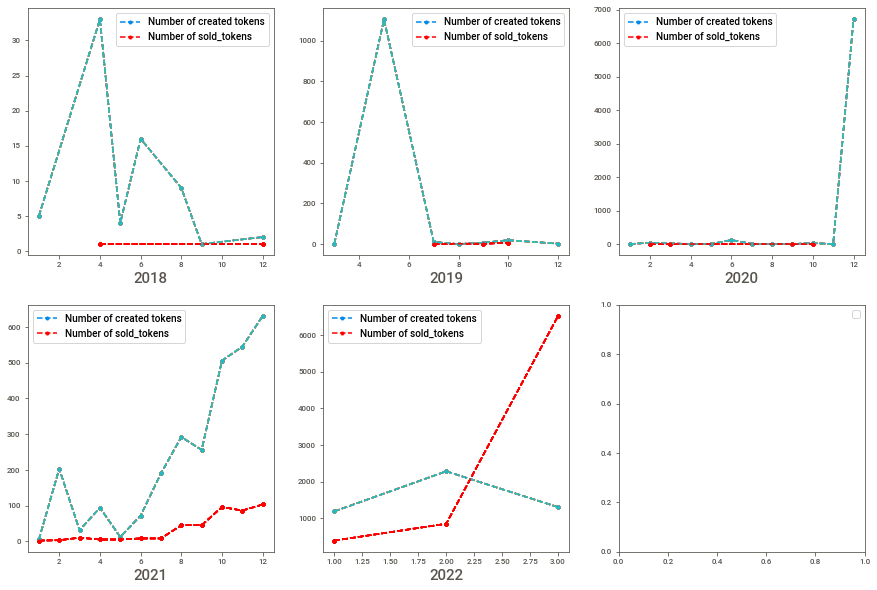

In [215]:
year_l=[2018,2019,2020,2021,2022]
fig,ax=  plt.subplots(nrows=2,ncols=3, sharex=False, sharey= False, figsize=(24,16)) 
ax = ax.flatten()
ind=[0,1,2,3,4,5]
L=plt.legend()
ast_cat=assets['asset_category'].unique()
for items in ast_cat:
#print(ast_cat)
 for y,i in  zip(year_l,ind) :
    assets[(assets['year_created'])==y].groupby(['Month_created'])['asset_contract_owner'].count().plot(kind='line',figsize=(15,10),ax=ax[i],linestyle='--', marker='o',use_index=True,legend=True)
    assets[(assets['year_sale'])==y].groupby(['Month_sale'])['last_sale_quantity'].count().plot(kind='line',figsize=(15,10),ax=ax[i],linestyle='--',color='red', marker='o',use_index=True,legend=True)
    
    ax[i].set_xlabel(y, fontsize=1)
    ax[i].set_xlabel(y, fontsize=15)
    ax[i].legend(labels=['Number of created tokens','Number of sold_tokens'])
plt.show()
#plt.savefig('Number of NFTS created each year.png')    
 


<a name = section5></a>

---
# **5. Data Post-Processing**
---


In [216]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150171 entries, 0 to 150173
Data columns (total 87 columns):
 #   Column                                               Non-Null Count   Dtype         
---  ------                                               --------------   -----         
 0   asset_token_id                                       150171 non-null  object        
 1   asset_contract_address                               150171 non-null  object        
 2   asset_owner_address                                  150171 non-null  object        
 3   asset_owner_user                                     133796 non-null  object        
 4   collection_slug                                      150171 non-null  object        
 5   created_date                                         150171 non-null  datetime64[ns]
 6   quantity                                             150111 non-null  float64       
 7   listing_time                                         96353 non-null   date

In [217]:
train_df.event_type.unique()

array(['created', 'successful', 'transfer', 'cancelled', 'offer_entered',
       'bid_entered', 'bid_withdrawn', 'approve'], dtype=object)

In [218]:
train_df.drop(columns=['asset_token_id', 'asset_contract_address', 'asset_owner_address',
       'asset_owner_user'],inplace=True)

In [219]:
train_df.drop(columns=['transaction_from_account_address', 'transaction_to_account_address',
       'from_account_address', 'to_account_address',
       'primary_asset_contracts_address',
       'primary_asset_contracts_asset_contract_type',
       'primary_asset_contracts_created_date', 'primary_asset_contracts_name',
       'primary_asset_contracts_nft_version',
       'primary_asset_contracts_schema_name', 'primary_asset_contracts_symbol'],inplace=True)


In [220]:
train_df.drop(columns=[ 'primary_asset_contracts_description',
       'primary_asset_contracts_dev_seller_fee_basis_points',
       'primary_asset_contracts_seller_fee_basis_points',
       'primary_asset_contracts_payout_address'],inplace=True)

In [221]:
train_df.drop(columns=['stats_time', 'description',
       'display_data_card_display_style', 'safelist_request_status', 'name',
       'telegram_url', 'twitter_username', 'instagram_username', 'discord_url',
       'medium_username', 'external_url', 'token_id', 'owner_address',
       'last_sale_payment_token_symbol', 'last_sale_payment_token_address',
       'last_sale_payment_token_name', 'last_sale_payment_token_eth_price'],inplace=True)

In [222]:
train_df.drop(columns=['last_sale_transaction_from_account_address',
       'last_sale_transaction_timestamp',
       'last_sale_transaction_to_account_address', 'last_sale_event_timestamp'],inplace=True)

In [223]:
train_df.columns

Index(['collection_slug', 'created_date', 'quantity', 'listing_time',
       'event_type', 'total_price', 'auction_type', 'duration', 'ending_price',
       'starting_price', 'is_private', 'primary_asset_contracts_total_supply',
       'stats_one_day_volume', 'stats_one_day_change', 'stats_one_day_sales',
       'stats_one_day_average_price', 'stats_seven_day_volume',
       'stats_seven_day_change', 'stats_seven_day_sales',
       'stats_seven_day_average_price', 'stats_thirty_day_volume',
       'stats_thirty_day_change', 'stats_thirty_day_sales',
       'stats_thirty_day_average_price', 'stats_total_volume',
       'stats_total_sales', 'stats_total_supply', 'stats_count',
       'stats_num_owners', 'stats_average_price', 'stats_market_cap',
       'stats_floor_price', 'slug', 'last_sale_payment_token_usd_price',
       'last_sale_total_price', 'last_sale_created_date', 'last_sale_quantity',
       'is_presale', 'traits', 'num_sales', 'image_url', 'asset_contract_type',
       'asset

In [224]:
train_df.drop(columns=['created_date','listing_time','is_private','slug','last_sale_created_date','image_url','asset_contract_created_date', 'asset_contract_name',
       'asset_contract_dev_seller_fee_basis_points'],inplace=True)

In [225]:
train_df.columns

Index(['collection_slug', 'quantity', 'event_type', 'total_price',
       'auction_type', 'duration', 'ending_price', 'starting_price',
       'primary_asset_contracts_total_supply', 'stats_one_day_volume',
       'stats_one_day_change', 'stats_one_day_sales',
       'stats_one_day_average_price', 'stats_seven_day_volume',
       'stats_seven_day_change', 'stats_seven_day_sales',
       'stats_seven_day_average_price', 'stats_thirty_day_volume',
       'stats_thirty_day_change', 'stats_thirty_day_sales',
       'stats_thirty_day_average_price', 'stats_total_volume',
       'stats_total_sales', 'stats_total_supply', 'stats_count',
       'stats_num_owners', 'stats_average_price', 'stats_market_cap',
       'stats_floor_price', 'last_sale_payment_token_usd_price',
       'last_sale_total_price', 'last_sale_quantity', 'is_presale', 'traits',
       'num_sales', 'asset_contract_type', 'asset_favorites',
       'asset_category'],
      dtype='object')

In [226]:
#TAking sucessfull event_type
train_newdf=train_df.loc[train_df['event_type']=='successful']

In [227]:
train_newdf.columns

Index(['collection_slug', 'quantity', 'event_type', 'total_price',
       'auction_type', 'duration', 'ending_price', 'starting_price',
       'primary_asset_contracts_total_supply', 'stats_one_day_volume',
       'stats_one_day_change', 'stats_one_day_sales',
       'stats_one_day_average_price', 'stats_seven_day_volume',
       'stats_seven_day_change', 'stats_seven_day_sales',
       'stats_seven_day_average_price', 'stats_thirty_day_volume',
       'stats_thirty_day_change', 'stats_thirty_day_sales',
       'stats_thirty_day_average_price', 'stats_total_volume',
       'stats_total_sales', 'stats_total_supply', 'stats_count',
       'stats_num_owners', 'stats_average_price', 'stats_market_cap',
       'stats_floor_price', 'last_sale_payment_token_usd_price',
       'last_sale_total_price', 'last_sale_quantity', 'is_presale', 'traits',
       'num_sales', 'asset_contract_type', 'asset_favorites',
       'asset_category'],
      dtype='object')

In [228]:
train_newdf.drop(columns=['auction_type', 'duration', 'ending_price', 'starting_price'],inplace=True)

In [229]:
train_newdf.dropna(inplace=True)

In [230]:
train_newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10178 entries, 189 to 131710
Data columns (total 34 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   collection_slug                       10178 non-null  object 
 1   quantity                              10178 non-null  float64
 2   event_type                            10178 non-null  object 
 3   total_price                           10178 non-null  float64
 4   primary_asset_contracts_total_supply  10178 non-null  float64
 5   stats_one_day_volume                  10178 non-null  float64
 6   stats_one_day_change                  10178 non-null  float64
 7   stats_one_day_sales                   10178 non-null  int64  
 8   stats_one_day_average_price           10178 non-null  float64
 9   stats_seven_day_volume                10178 non-null  float64
 10  stats_seven_day_change                10178 non-null  float64
 11  stats_seven_

In [231]:
train_newdf['stats_total_sales'].sort_values(ascending=False)

49503     2.067212e+09
49498     2.067212e+09
66135     2.067212e+09
66134     2.067212e+09
66133     2.067212e+09
66132     2.067212e+09
66131     2.067212e+09
66129     2.067212e+09
49508     2.067212e+09
49507     2.067212e+09
49506     2.067212e+09
49505     2.067212e+09
49504     2.067212e+09
49527     2.067212e+09
49502     2.067212e+09
49501     2.067212e+09
49500     2.067212e+09
66136     2.067212e+09
49509     2.067212e+09
49510     2.067212e+09
49519     2.067212e+09
49525     2.067212e+09
49524     2.067212e+09
49523     2.067212e+09
49522     2.067212e+09
49521     2.067212e+09
49520     2.067212e+09
49518     2.067212e+09
49511     2.067212e+09
49517     2.067212e+09
49516     2.067212e+09
49515     2.067212e+09
49514     2.067212e+09
49513     2.067212e+09
49512     2.067212e+09
49499     2.067212e+09
49526     2.067212e+09
49497     2.067212e+09
49496     2.067212e+09
49495     2.067212e+09
94489     3.534700e+04
117692    3.052200e+04
117716    3.052200e+04
117690    3

In [232]:
NFT_ML=train_newdf.loc[train_newdf['stats_total_sales']>4000]

In [233]:
NFT_ML.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7230 entries, 189 to 131710
Data columns (total 34 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   collection_slug                       7230 non-null   object 
 1   quantity                              7230 non-null   float64
 2   event_type                            7230 non-null   object 
 3   total_price                           7230 non-null   float64
 4   primary_asset_contracts_total_supply  7230 non-null   float64
 5   stats_one_day_volume                  7230 non-null   float64
 6   stats_one_day_change                  7230 non-null   float64
 7   stats_one_day_sales                   7230 non-null   int64  
 8   stats_one_day_average_price           7230 non-null   float64
 9   stats_seven_day_volume                7230 non-null   float64
 10  stats_seven_day_change                7230 non-null   float64
 11  stats_seven_d

In [234]:
NFT_ML.columns

Index(['collection_slug', 'quantity', 'event_type', 'total_price',
       'primary_asset_contracts_total_supply', 'stats_one_day_volume',
       'stats_one_day_change', 'stats_one_day_sales',
       'stats_one_day_average_price', 'stats_seven_day_volume',
       'stats_seven_day_change', 'stats_seven_day_sales',
       'stats_seven_day_average_price', 'stats_thirty_day_volume',
       'stats_thirty_day_change', 'stats_thirty_day_sales',
       'stats_thirty_day_average_price', 'stats_total_volume',
       'stats_total_sales', 'stats_total_supply', 'stats_count',
       'stats_num_owners', 'stats_average_price', 'stats_market_cap',
       'stats_floor_price', 'last_sale_payment_token_usd_price',
       'last_sale_total_price', 'last_sale_quantity', 'is_presale', 'traits',
       'num_sales', 'asset_contract_type', 'asset_favorites',
       'asset_category'],
      dtype='object')

In [235]:
NFT_ML.drop(columns=['event_type','primary_asset_contracts_total_supply','stats_count','is_presale','asset_contract_type','stats_num_owners'],inplace=True)


In [236]:
NFT_ML.head()
NFT_ML.drop(columns=['traits','collection_slug'],inplace=True)

In [237]:
NFT_ML.drop_duplicates(inplace=True)

In [238]:
NFT_ML.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7075 entries, 189 to 131710
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   quantity                           7075 non-null   float64
 1   total_price                        7075 non-null   float64
 2   stats_one_day_volume               7075 non-null   float64
 3   stats_one_day_change               7075 non-null   float64
 4   stats_one_day_sales                7075 non-null   int64  
 5   stats_one_day_average_price        7075 non-null   float64
 6   stats_seven_day_volume             7075 non-null   float64
 7   stats_seven_day_change             7075 non-null   float64
 8   stats_seven_day_sales              7075 non-null   int64  
 9   stats_seven_day_average_price      7075 non-null   float64
 10  stats_thirty_day_volume            7075 non-null   float64
 11  stats_thirty_day_change            7075 non-null   f

<a name = section51></a>
### **5.1 Data Encoding**

- In this section, we will encode our categorical features as necessary and drop any column as necessary

In [239]:
# convert categorical variable into numeric by encoding for train dataset
X_encoded = pd.get_dummies(NFT_ML, drop_first=True)

In [240]:
X_encoded.drop_duplicates(inplace=True)


In [241]:
X_encoded.head()

,quantity,total_price,stats_one_day_volume,stats_one_day_change,stats_one_day_sales,stats_one_day_average_price,stats_seven_day_volume,stats_seven_day_change,stats_seven_day_sales,stats_seven_day_average_price,stats_thirty_day_volume,stats_thirty_day_change,stats_thirty_day_sales,stats_thirty_day_average_price,stats_total_volume,stats_total_sales,stats_total_supply,stats_average_price,stats_market_cap,stats_floor_price,last_sale_payment_token_usd_price,last_sale_total_price,last_sale_quantity,num_sales,asset_favorites,asset_category_collectibles,asset_category_music,asset_category_photography,asset_category_sports,asset_category_trading-cards,asset_category_utility,asset_category_virtual-worlds
189,1.0,3.600000e+16,0.5248,-0.798914,13,0.040369,7.025033,-0.537308,191,0.03678,400.633516,0.0,5163,0.077597,400.633516,5163.0,10394,0.077597,382.294222,0.015,2630.0,3.600000e+16,1.0,1.0,2,0,0,1,0,0,0,0
195,1.0,3.675000e+17,0.5248,-0.798914,13,0.040369,7.025033,-0.537308,191,0.03678,400.633516,0.0,5163,0.077597,400.633516,5163.0,10394,0.077597,382.294222,0.015,2623.6,3.675000e+17,1.0,1.0,10,0,0,1,0,0,0,0
199,1.0,4.440000e+16,0.5248,-0.798914,13,0.040369,7.025033,-0.537308,191,0.03678,400.633516,0.0,5163,0.077597,400.633516,5163.0,10394,0.077597,382.294222,0.015,2628.8,1.099000e+17,1.0,1.0,0,1,0,0,0,0,0,0
200,1.0,4.440000e+16,0.5248,-0.798914,13,0.040369,7.025033,-0.537308,191,0.03678,400.633516,0.0,5163,0.077597,400.633516,5163.0,10394,0.077597,382.294222,0.015,2630.0,4.440000e+16,1.0,1.0,3,0,0,1,0,0,0,0
201,1.0,4.440000e+16,0.5248,-0.798914,13,0.040369,7.025033,-0.537308,191,0.03678,400.633516,0.0,5163,0.077597,400.633516,5163.0,10394,0.077597,382.294222,0.015,2630.0,1.000000e+16,1.0,1.0,0,0,0,0,1,0,0,0


<a name = section52></a>
### **5.2 Data Preparation**

- Now we will **split** our **data** into **dependent** and **independent** variables for further development.

In [242]:
y= NFT_ML['stats_average_price']

In [243]:
X= X_encoded.drop(columns=['stats_average_price'],axis=1)

In [244]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7075 entries, 189 to 131710
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   quantity                           7075 non-null   float64
 1   total_price                        7075 non-null   float64
 2   stats_one_day_volume               7075 non-null   float64
 3   stats_one_day_change               7075 non-null   float64
 4   stats_one_day_sales                7075 non-null   int64  
 5   stats_one_day_average_price        7075 non-null   float64
 6   stats_seven_day_volume             7075 non-null   float64
 7   stats_seven_day_change             7075 non-null   float64
 8   stats_seven_day_sales              7075 non-null   int64  
 9   stats_seven_day_average_price      7075 non-null   float64
 10  stats_thirty_day_volume            7075 non-null   float64
 11  stats_thirty_day_change            7075 non-null   f

In [245]:
X.shape

(7075, 31)

In [246]:
X.head(5)

,quantity,total_price,stats_one_day_volume,stats_one_day_change,stats_one_day_sales,stats_one_day_average_price,stats_seven_day_volume,stats_seven_day_change,stats_seven_day_sales,stats_seven_day_average_price,stats_thirty_day_volume,stats_thirty_day_change,stats_thirty_day_sales,stats_thirty_day_average_price,stats_total_volume,stats_total_sales,stats_total_supply,stats_market_cap,stats_floor_price,last_sale_payment_token_usd_price,last_sale_total_price,last_sale_quantity,num_sales,asset_favorites,asset_category_collectibles,asset_category_music,asset_category_photography,asset_category_sports,asset_category_trading-cards,asset_category_utility,asset_category_virtual-worlds
189,1.0,3.600000e+16,0.5248,-0.798914,13,0.040369,7.025033,-0.537308,191,0.03678,400.633516,0.0,5163,0.077597,400.633516,5163.0,10394,382.294222,0.015,2630.0,3.600000e+16,1.0,1.0,2,0,0,1,0,0,0,0
195,1.0,3.675000e+17,0.5248,-0.798914,13,0.040369,7.025033,-0.537308,191,0.03678,400.633516,0.0,5163,0.077597,400.633516,5163.0,10394,382.294222,0.015,2623.6,3.675000e+17,1.0,1.0,10,0,0,1,0,0,0,0
199,1.0,4.440000e+16,0.5248,-0.798914,13,0.040369,7.025033,-0.537308,191,0.03678,400.633516,0.0,5163,0.077597,400.633516,5163.0,10394,382.294222,0.015,2628.8,1.099000e+17,1.0,1.0,0,1,0,0,0,0,0,0
200,1.0,4.440000e+16,0.5248,-0.798914,13,0.040369,7.025033,-0.537308,191,0.03678,400.633516,0.0,5163,0.077597,400.633516,5163.0,10394,382.294222,0.015,2630.0,4.440000e+16,1.0,1.0,3,0,0,1,0,0,0,0
201,1.0,4.440000e+16,0.5248,-0.798914,13,0.040369,7.025033,-0.537308,191,0.03678,400.633516,0.0,5163,0.077597,400.633516,5163.0,10394,382.294222,0.015,2630.0,1.000000e+16,1.0,1.0,0,0,0,0,1,0,0,0


In [247]:
X.fillna(0, inplace=True)

In [248]:
# 20% data as validation set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22)

We will try to see which feature are more important using SelectKBest

# feature selection
def select_features(X_train, y_train, X_valid):
    #configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    #fs = SelectKBest(score_func=mutual_info_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_valid_fs = fs.transform(X_valid)
    return X_train_fs, X_valid_fs, fs

# feature selection
X_train_fs, X_valid_fs, fs = select_features(X_train, y_train, X_valid)

# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    # plot the scores
    plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
    plt.show()

In [249]:
# Using LR Model for feature importance
features= X_train.columns
LR = LinearRegression(normalize=True)
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
coef = pd.Series(LR.coef_,features).sort_values()

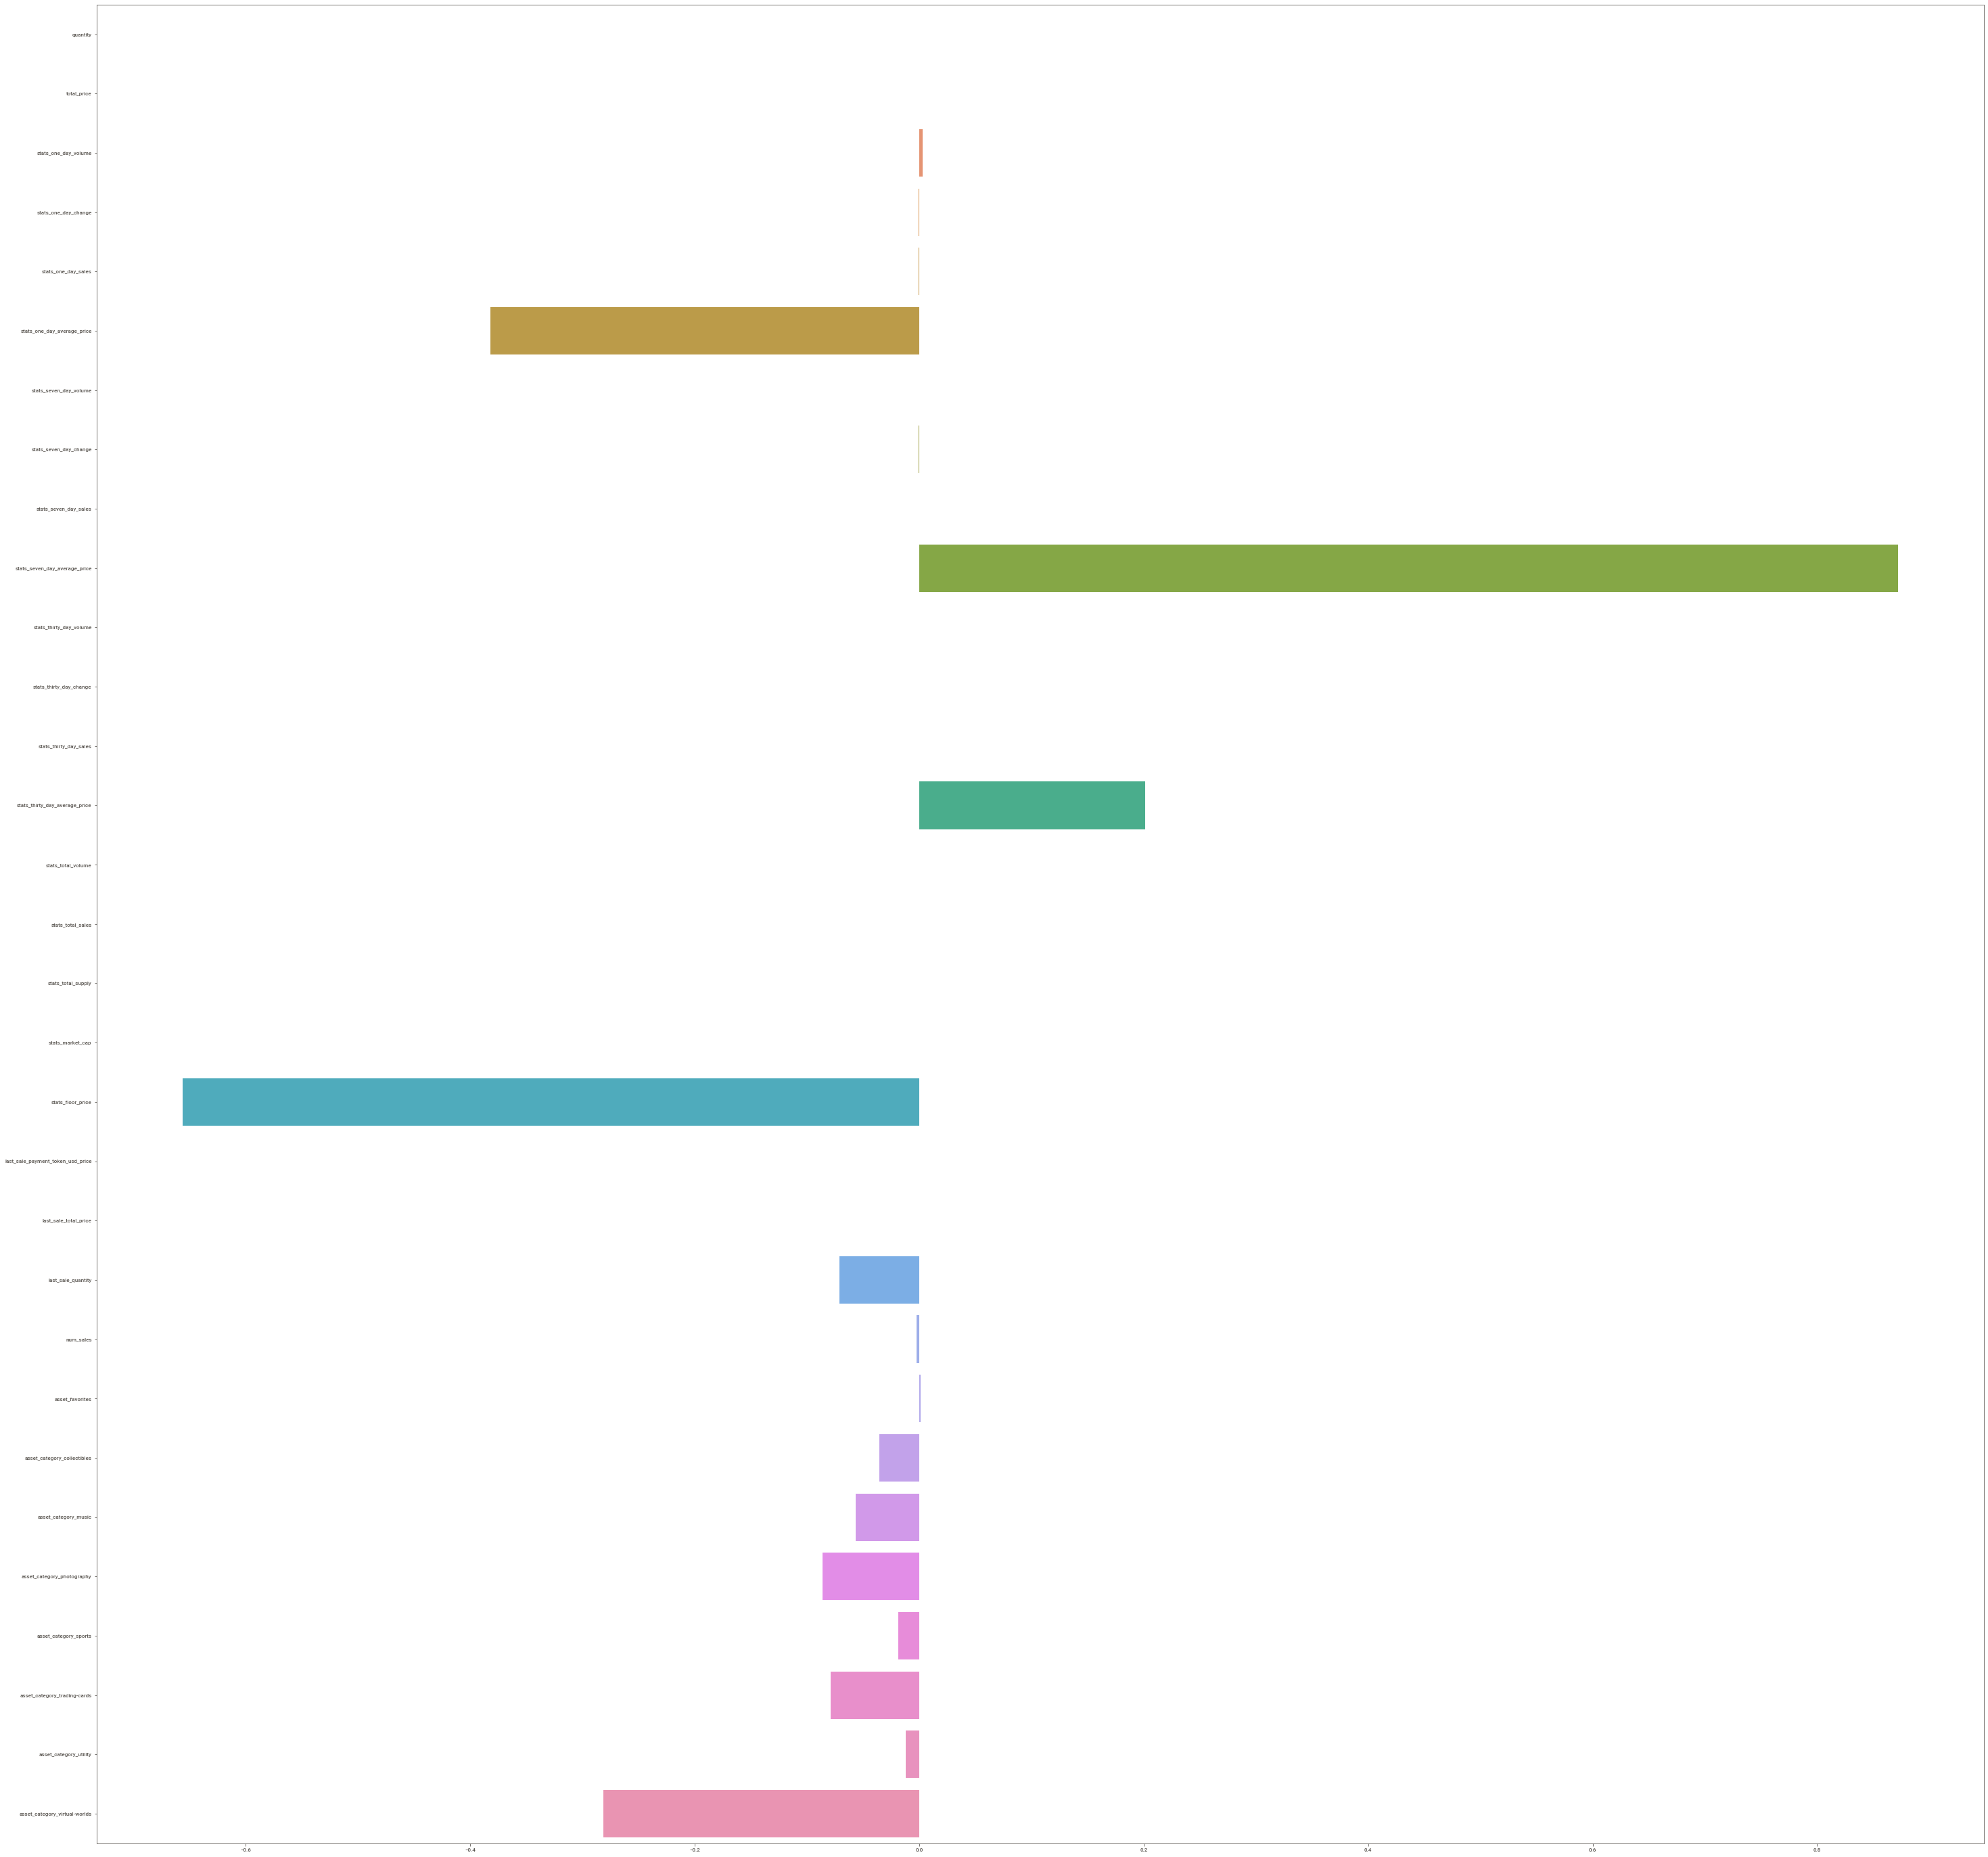

In [250]:
# Barplot for coefficients
plt.figure(figsize=(50,50))
sns.barplot(y=features,x=LR.coef_)
plt.show()

<a name = section53></a>
### **5.3 Data Scaling**



<a name = section6></a>

---
# **6. Model Building & Evaluation**
---


In [251]:
LR.fit(X_train,y_train)
y_predict=LR.predict(X_test)

<a name=section61></a>

### **6.1 Model Building**

- Model building and Training using KNN for validation purpose

<a name=section62></a>

### **6.2 Model Evaluation**

- Model evaluation using RMSE Score

In [252]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
r2_score(y_test,y_predict)
rmse=np.sqrt(mean_squared_error(y_test,y_predict))
print('root mean squared error is ',rmse)
r2_score(y_test,y_predict)

root mean squared error is  0.4805127711040479


0.8400365339118089

In [253]:
#implementing kfold for linear regression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
kf= KFold(n_splits=5)
kfold_score = cross_val_score(LR,X_test,y_test,cv=kf)


In [254]:
print("The cross validation scores of k-fold method with 5 folds is",kfold_score)

The cross validation scores of k-fold method with 5 folds is [0.91859238 0.97506615 0.95165896 0.98974239 0.74369313]


In [255]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train,y_train)
y_predict_dt=regressor.predict(X_test)
print(r2_score(y_test,y_predict_dt))
print(regressor.score(X_test,y_test))
rmse=np.sqrt(mean_squared_error(y_test,y_predict_dt))
print('root mean squared error is ',rmse)

0.9996620809004648
0.9996620809004648
root mean squared error is  0.022085177881371713


In [256]:
#implementing kfold for decision treee regressor
kfold_scoredt=cross_val_score(regressor,X,y,cv=kf)
print("The cross validation scores of k-fold method with 5 folds is",kfold_scoredt)

The cross validation scores of k-fold method with 5 folds is [0.94631963 0.9998725  0.96023717 0.9831764  0.99014151]


In [257]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor( random_state=42)
regr.fit(X_train,y_train)
y_pred=regr.predict(X_test)
X_test
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('root mean squared error is ',rmse)

root mean squared error is  0.03820696777245479


In [258]:
r2_score(y_test,y_pred)

0.9989886625716912

In [259]:
print(regr.score(X_test,y_test))

0.9989886625716912


In [260]:
from sklearn.ensemble import GradientBoostingRegressor

In [261]:
sgdreg= GradientBoostingRegressor(n_estimators=1000)
sgdreg.fit(X_train,y_train)
y_predict_sgdreg=sgdreg.predict(X_test)
print('test score is',sgdreg.score(X_test,y_test))
print('train score',sgdreg.score(X_train,y_train))
rmse=np.sqrt(mean_squared_error(y_test,y_predict_sgdreg))
print('root mean squared error is ',rmse)

test score is 0.999942196145436
train score 0.999999233580705
root mean squared error is  0.009134250797368428


kfold_score_GBR=cross_val_score(sgdreg,X_train,y_train,cv=5)
print("training score",np.mean(kfold_score_GBR))

kfold_score_GBR=cross_val_score(sgdreg,X_test,y_test,cv=5)
print("testing score",np.mean(kfold_score_GBR))
    

In [262]:
from sklearn.neighbors import KNeighborsRegressor


model = KNeighborsRegressor()
# fit the model
model.fit(X_test, y_test)
y_pred_Knr=model.predict(X_test)
model.score(X_test,y_test)
rmse=np.sqrt(mean_squared_error(y_test,y_pred_Knr))
print('root mean squared error is ',rmse)

root mean squared error is  0.6573144968465743


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7075 entries, 189 to 131710
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   quantity                           7075 non-null   float64
 1   total_price                        7075 non-null   float64
 2   stats_one_day_volume               7075 non-null   float64
 3   stats_one_day_change               7075 non-null   float64
 4   stats_one_day_sales                7075 non-null   int64  
 5   stats_one_day_average_price        7075 non-null   float64
 6   stats_seven_day_volume             7075 non-null   float64
 7   stats_seven_day_change             7075 non-null   float64
 8   stats_seven_day_sales              7075 non-null   int64  
 9   stats_seven_day_average_price      7075 non-null   float64
 10  stats_thirty_day_volume            7075 non-null   float64
 11  stats_thirty_day_change            7075 non-null   f

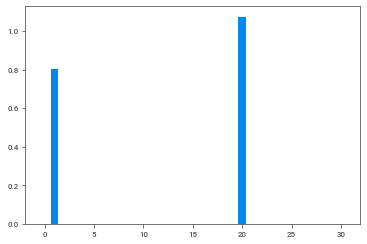

In [263]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

# define the model
model = KNeighborsRegressor()
# fit the model
model.fit(X_test, y_test)
# perform permutation importance
results = permutation_importance(model, X_test, y_test, scoring='neg_mean_squared_error')
X.info()
importance = results.importances_mean
print(importance)
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7075 entries, 189 to 131710
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   quantity                           7075 non-null   float64
 1   total_price                        7075 non-null   float64
 2   stats_one_day_volume               7075 non-null   float64
 3   stats_one_day_change               7075 non-null   float64
 4   stats_one_day_sales                7075 non-null   int64  
 5   stats_one_day_average_price        7075 non-null   float64
 6   stats_seven_day_volume             7075 non-null   float64
 7   stats_seven_day_change             7075 non-null   float64
 8   stats_seven_day_sales              7075 non-null   int64  
 9   stats_seven_day_average_price      7075 non-null   float64
 10  stats_thirty_day_volume            7075 non-null   float64
 11  stats_thirty_day_change            7075 non-null   f

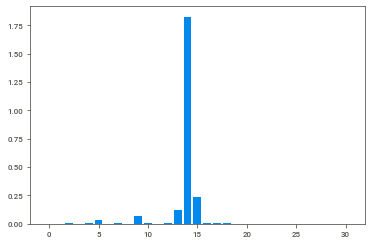

In [264]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

#using gradient boosting model for feature importance
results = permutation_importance(sgdreg, X_test, y_test, scoring='neg_mean_squared_error')
X.info()
importance = results.importances_mean
print(importance)
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

<a name=section63></a>

### **6.3 Model Prediction**

- Model prediction for Test dataset

<a name=section7></a>

----
## **7. Summary**
----


---
**Thank you and Happy Learning.**

---

In [265]:
thank_you_str="Thanks,Happy Learning,Collaboration,Thankyou,Keep Learning"
# create WordCloud with converted string
wordcloud = WordCloud(width = 1000, height = 500, random_state=1, background_color='white', collocations=True).generate(thank_you_str)
plt.figure(figsize=(20, 20))
plt.imshow(wordcloud) 
plt.axis("off")
plt.show()

NameError: name 'WordCloud' is not defined